In [ ]:
import pandas as pd
import os
import numpy as np


In [ ]:
os.chdir('drive/MyDrive')

In [ ]:
files=[f for f in os.listdir('./data_file_sale')]
all_month_data=pd.DataFrame()
for f in files:
  df=pd.read_csv("./data_file_sale/"+f)
  all_month_data=pd.concat([all_month_data,df])
all_month_data.to_csv("all_data.csv",index=False)

In [ ]:
all_data=pd.read_csv("all_data.csv")

In [ ]:
all_data=all_data.dropna(how="all")
anyvalue=all_data[all_data.isnull().any(axis=1)]
anyvalue

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [ ]:
all_data=all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data['Price Each']=all_data['Price Each'].astype('float')
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int')
all_data["sales"]=all_data["Price Each"] * all_data["Quantity Ordered"]
all_data

In [ ]:
all_data["month"]=all_data['Order Date'].str[0:2]

In [ ]:
def sum_fun(df):
  su=df['sales'].sum()
  return su
new_data=all_data.groupby("month").apply(sum_fun).reset_index(name="sum_fo_month_sale")

In [ ]:
all_data.groupby('month').sum()
new_data["sum_fo_month_sale"]

<ipython-input-10-d95a9351795a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('month').sum()


0     1822256.73
1     2202022.42
2     2807100.38
3     3390670.24
4     3152606.75
5     2577802.26
6     2647775.76
7     2244467.88
8     2097560.13
9     3736726.88
10    3199603.20
11    4613443.34
Name: sum_fo_month_sale, dtype: float64

[ 1  2  3  4  5  6  7  8  9 10 11 12]


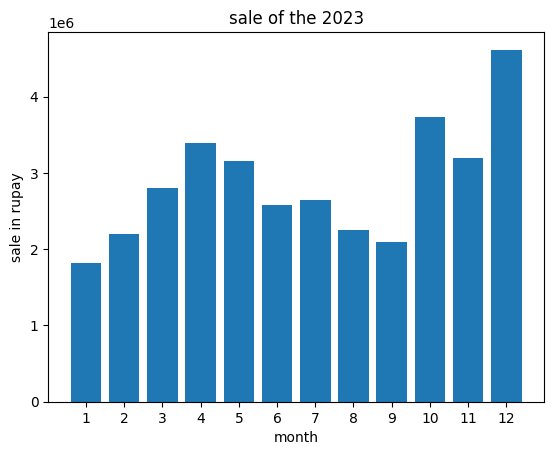

In [ ]:
import matplotlib.pyplot as plt
# from matplotlib.ticker import ScalarFormatter
m=np.arange(1,13)
print(m)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(m, range(1, 13))
# plt.ticklabel_format(axis='y', style='plain')
plt.ylabel("sale in rupay")
plt.xlabel("month")
plt.title("sale of the 2023")
plt.bar(m,new_data["sum_fo_month_sale"])
plt.show()

In [ ]:

# what city have highest number  of sales
all_data[all_data.isnull().any(axis=1)]
# check any null value in the datasheet
# i use the apply function and split function find the city
def split_add(x):
  s=x.split(",")
  r=s[-1].split(" ")
  return s[-2]+' '+ r[1]

all_data["city"]=all_data["Purchase Address"].apply(split_add)
all_data

In [ ]:
# make the group of the city find the which city have the high sale
def sale_city(df):
  s=df["sales"].sum()
  return s
new_city_=all_data.groupby("city").apply(sale_city).reset_index(name="sum_city_sale")
new_city_

,city,sum_city_sale
0,Atlanta GA,2795498.58
1,Austin TX,1819581.75
2,Boston MA,3661642.01
3,Dallas TX,2767975.40
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
6,Portland ME,449758.27
7,Portland OR,1870732.34
8,San Francisco CA,8262203.91
9,Seattle WA,2747755.48


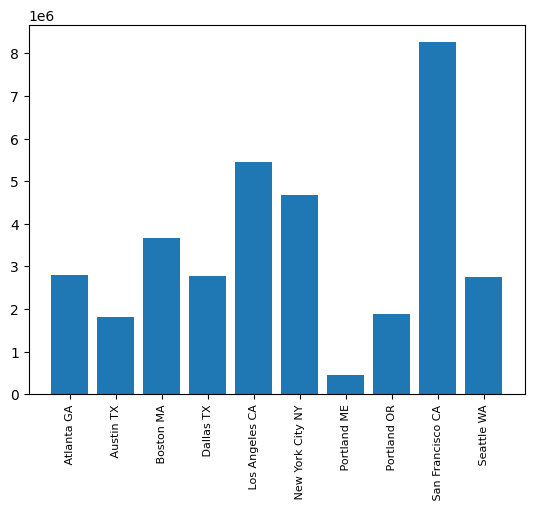

In [ ]:
import matplotlib.pyplot as plt
c=new_city_["city"].unique()
plt.bar(c,new_city_["sum_city_sale"])
plt.xticks(c,rotation="vertical",size=8)
plt.show()

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,city
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",11.95,06,Portland ME
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",1700.00,06,San Francisco CA
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",999.99,06,Los Angeles CA
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",149.99,06,Seattle WA
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",99.99,06,San Francisco CA


In [ ]:
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,city
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",11.95,06,Portland ME
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",1700.00,06,San Francisco CA
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",999.99,06,Los Angeles CA
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",149.99,06,Seattle WA
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",99.99,06,San Francisco CA


In [ ]:
all_data['hour']=all_data['Order Date'].dt.hour
all_data['minute']=all_data['Order Date'].dt.hour
all_data

Text(0.5, 1.0, 'most sale product in 24 hour')

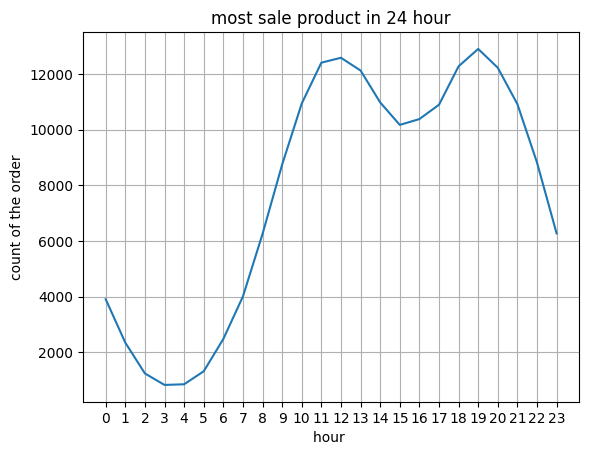

In [ ]:
new_date_time=all_data.groupby("hour").count()
new_date_time
plt.grid()
plt.xticks(new_date_time.index)
plt.plot(new_date_time.index,new_date_time['Quantity Ordered'])
plt.xlabel("hour ")
plt.ylabel("count of the order")
plt.title("most sale product in 24 hour")

In [ ]:
most_sale_product=all_data.groupby('Product').count()
most_sale_product

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,city,hour,minute
Product,,,,,,,,,,
20in Monitor,4101,4101,4101,4101,4101,4101,4101,4101,4101,4101
27in 4K Gaming Monitor,6230,6230,6230,6230,6230,6230,6230,6230,6230,6230
27in FHD Monitor,7507,7507,7507,7507,7507,7507,7507,7507,7507,7507
34in Ultrawide Monitor,6181,6181,6181,6181,6181,6181,6181,6181,6181,6181
AA Batteries (4-pack),20577,20577,20577,20577,20577,20577,20577,20577,20577,20577
AAA Batteries (4-pack),20641,20641,20641,20641,20641,20641,20641,20641,20641,20641
Apple Airpods Headphones,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549
Bose SoundSport Headphones,13325,13325,13325,13325,13325,13325,13325,13325,13325,13325
Flatscreen TV,4800,4800,4800,4800,4800,4800,4800,4800,4800,4800


In [ ]:
plt.bar(most_sale_product.index,most_sale_product['Quantity Ordered'])
plt.xticks(most_sale_product.index,rotation="vertical")
plt.show()

In [ ]:
df=all_data[all_data["Order Date"].duplicated(keep=False)]
df["grouporder"]=df.groupby(["Order ID"])['Product'].transform(lambda x:",".join(x))
df=df.drop_duplicates(['Order ID','grouporder'])
df

<ipython-input-22-0a064c40c548>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["grouporder"]=df.groupby(["Order ID"])['Product'].transform(lambda x:",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,city,hour,minute,grouporder
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",11.95,06,Portland ME,19,19,USB-C Charging Cable
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",149.99,06,Seattle WA,10,10,27in FHD Monitor
5,209926,Apple Airpods Headphones,1,150.00,2019-06-28 20:04:00,"386 Lake St, Seattle, WA 98101",150.00,06,Seattle WA,20,20,Apple Airpods Headphones
9,209930,27in FHD Monitor,1,149.99,2019-06-02 11:22:00,"625 Ridge St, Los Angeles, CA 90001",149.99,06,Los Angeles CA,11,11,27in FHD Monitor
13,209934,AAA Batteries (4-pack),1,2.99,2019-06-13 20:53:00,"387 Dogwood St, Boston, MA 02215",2.99,06,Boston MA,20,20,AAA Batteries (4-pack)
...,...,...,...,...,...,...,...,...,...,...,...,...
186831,150483,Vareebadd Phone,1,400.00,2019-01-25 10:48:00,"763 Wilson St, Portland, OR 97035",400.00,01,Portland OR,10,10,Vareebadd Phone
186832,150484,Lightning Charging Cable,1,14.95,2019-01-26 22:04:00,"720 2nd St, Los Angeles, CA 90001",14.95,01,Los Angeles CA,22,22,Lightning Charging Cable
186838,150490,Lightning Charging Cable,1,14.95,2019-01-03 17:20:00,"817 Forest St, Portland, OR 97035",14.95,01,Portland OR,17,17,Lightning Charging Cable
186840,150492,Wired Headphones,1,11.99,2019-01-03 21:54:00,"998 Jackson St, Dallas, TX 75001",11.99,01,Dallas TX,21,21,Wired Headphones


In [ ]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in df["grouporder"]:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [ ]:
# what product sold the most ? why do you think it sold the most

([<matplotlib.axis.XTick at 0x7b22bea991e0>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

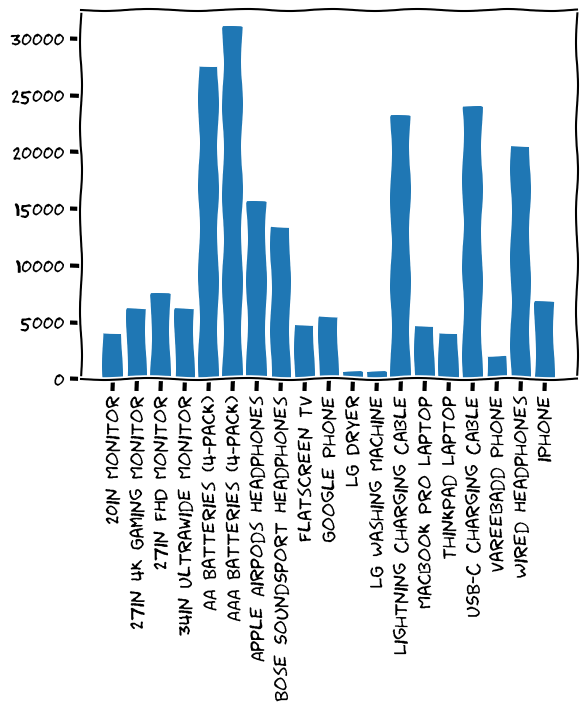

In [ ]:
all_dat=all_data.groupby('Product')['Quantity Ordered'].sum().reset_index(name="count_the_product")
all=all_dat["Product"]
plt.bar(all,all_dat['count_the_product'])
plt.xticks(all,rotation=90)

In [ ]:
import matplotlib.pyplot as plt
plt.xkcd()
# plt.style.use=('seaborn-v0_8-whitegrid')
price=all_data.groupby('Product')['Price Each'].mean().reset_index(name="mean_product")
fig, ax1=plt.subplots()
ax2=ax1.twinx()

ax1.bar(all,all_dat['count_the_product'],color='#123464')

ax2.plot(all,price['mean_product'])
ax1.set_xlabel("Product")
ax1.set_ylabel("count_the_product")
ax2.set_ylabel('price $')
ax1.set_xticklabels(all,rotation=80)

In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
